In [49]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)
library(kmed)


In [50]:
#cargar
df <- read.csv(file = '../../../../dataframes/envipe/2016/tmod_vic_envipe2016_09_transform.csv')
data <- df
head(data)


BPCOD,BP1_1,BP1_2C,BP1_3C,BP1_4,BP1_5,BP1_6,BP1_20,BP1_23,BP1_30,BP1_33
0.06878814,0.08465562,0.09799477,0.03077594,0.08247602,0.09851787,0.07088056,0.1,0.05353095,0.1,0.06373147
0.06878814,0.09956408,0.09799477,0.03077594,0.08247602,0.09851787,0.07088056,0.1,0.09189189,0.1,0.06373147
0.06878814,0.08465562,0.09799477,0.03077594,0.01438535,0.03853531,0.07088056,0.1,0.09607672,0.1,0.06373147
0.06878814,0.09956408,0.09799477,0.03077594,0.08247602,0.09851787,0.07088056,0.1,0.01142110,0.1,0.06373147
0.06878814,0.03984307,0.09799477,0.03077594,0.05039233,0.03853531,0.07088056,0.1,0.05353095,0.1,0.06373147
0.09398431,0.10000000,0.09799477,0.03077594,0.05039233,0.07175240,0.07088056,0.1,0.05353095,0.1,0.09965126


In [53]:
data <- as.matrix(data)
dist_data <- kmed::distmix(data = data, method = "gower", idnum = 1:11, idbin = NULL, idcat = NULL)

ERROR: Error in kmed::distmix(data = data, method = "gower", idnum = 1:11, idbin = NULL, : There is no mixed variables!


In [33]:
range_k = 2:10
dunn_kmedoids <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
#  kmeans <- stats::kmeans(x = data, centers = k, nstart = 25)
    kmedoids <- kmed::fastkmed(distdata = dist_data,
                               ncluster = k, 
                               iterate = 25)
  
  index_internal_kmedoids <- clusterCrit::intCriteria(traj = data,
                                                    part = as.integer(kmedoids$cluster), 
                                                    #part = kmeans$cluster, 
                                                    crit = "dunn")
  dunn_kmedoids[k-1] <- index_internal_kmedoids$dunn
}

In [34]:
max(dunn_kmedoids)

[1] 0.04147282

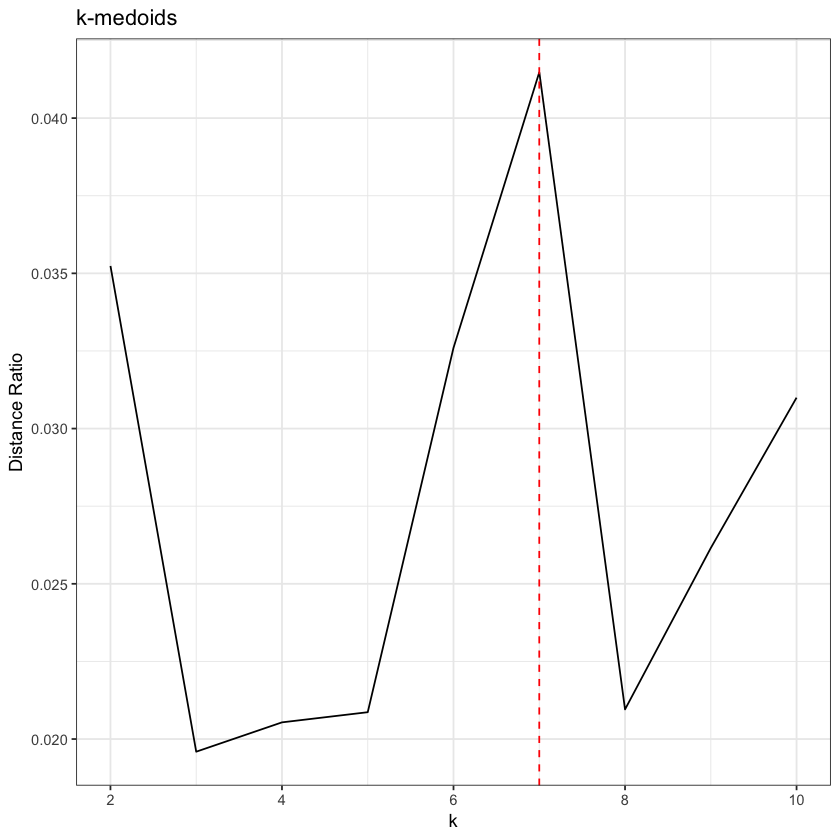

In [35]:
plot_dunn_kmedoids <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmedoids, 
                                   geom = 'line', 
                                   main = 'k-medoids', 
                                   xlab = 'k', 
                                   ylab = 'Distance Ratio')

plot_dunn_kmedoids <- plot_dunn_kmedoids  + 
  theme_bw() + #ylim(0,0.3) + 
  geom_vline(xintercept = range_k[which.max(dunn_kmedoids)],
             linetype = 2, color='red')   
#ggsave(filename = "../../images/enh/dunn_kmeans_2_15.png", dpi = 300)

plot_dunn_kmedoids

In [36]:
kmedoids <- kmed::fastkmed(distdata = dist_data,
                           ncluster = range_k[which.max(dunn_kmedoids)], 
                           iterate = 25)

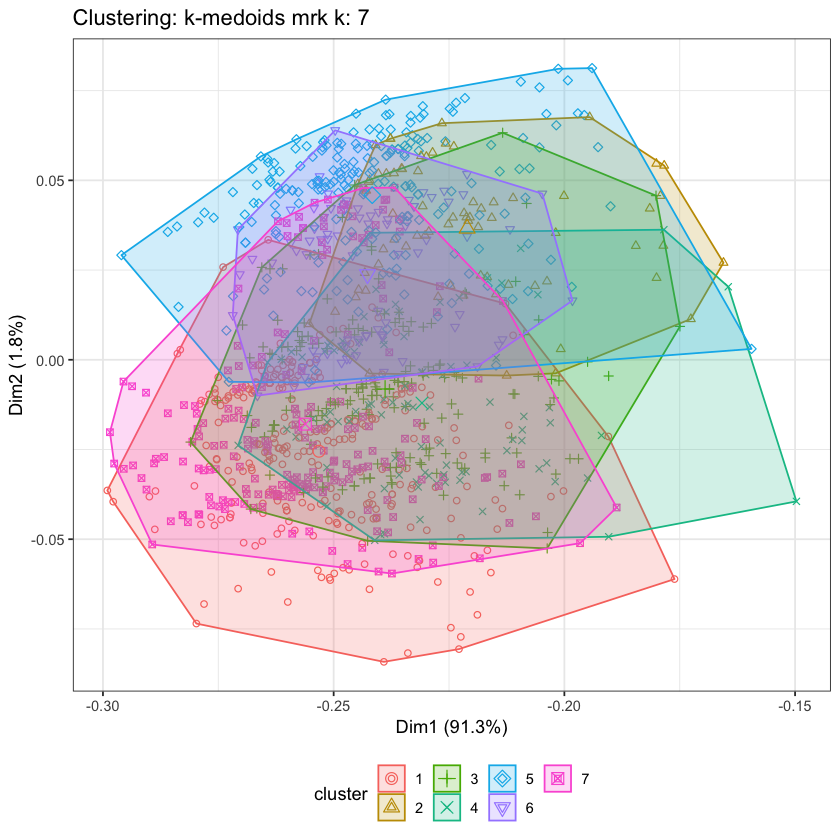

In [37]:
object <- list(data = data, cluster = kmedoids$cluster)
plot_kmedoids <- factoextra::fviz_cluster(object = object,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Clustering: k-medoids mrk k:', range_k[which.max(dunn_kmedoids)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmedoids <- plot_kmedoids + 
  theme_bw() +
  theme(legend.position = 'bottom')  

plot_kmedoids